In [1]:
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling
from napari_segment_blobs_and_things_with_membranes import seeded_watershed
from napari_segment_blobs_and_things_with_membranes import local_minima_seeded_watershed
from skimage.filters import gaussian
from pyclesperanto_prototype import imshow
from skimage.io import imread
from pyclesperanto_prototype import imshow
import pandas as pd
from pathlib import Path
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage import io, filters, measure, segmentation

In [2]:
#path to folder with images
data_folder = '....'
data_path = Path(data_folder)

In [6]:
#print list of file names in folder

for path in data_path.iterdir():
    print(path)

/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h
/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/4h


In [7]:
#check if the path leads to another folder and iterate over that if there

# Fisrt for loop: iterates over Project folder
for path in data_path.iterdir():
    print('Project folder path: \n', path)
    # Check if path leads to another folder
    if path.is_dir():
        # In case the condition is met, iterate over the new path
        for file_path in sorted(path.iterdir()):
            print('Dataset folder path: ', file_path)

Project folder path: 
 /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/1.czi
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/1.tif
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/2.czi
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/2.tif
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/3.czi
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/3.tif
Dataset folder path:  /home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/e

In [8]:
#assign conditions to groups from 12h and 16h folders and remove non image files

image_path_list_4h = []
image_path_list_16h = []
for path in data_path.iterdir():

    if path.is_dir():

        for file_path in sorted(path.iterdir()):
            # Check if file is image (ends with .tif) and if current folder name is '12h'
            if (file_path.suffix == '.tif') and (path.stem == '4h'):
                image_path_list_4h += [file_path]

            # Check if file is image (ends with .tif) and if current folder name is '16h'
            elif (file_path.suffix == '.tif') and (path.stem == '16h'):
                image_path_list_16h += [file_path]

print(image_path_list_4h)
print(image_path_list_16h)

[PosixPath('/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/4h/1.tif'), PosixPath('/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/4h/2.tif'), PosixPath('/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/4h/3.tif')]
[PosixPath('/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/1.tif'), PosixPath('/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/2.tif'), PosixPath('/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/mask/16h/3.tif')]


In [9]:
#read in the images 4h

images_4h = [io.imread(str(p)) for p in image_path_list_4h]


print(f"Loaded {len(images_4h)} images for 4h condition")

print(images_4h[0].shape)



Loaded 3 images for 4h condition
(104, 1024, 1024, 3)


In [6]:
#read in the images 16h

images_16h = [io.imread(str(p)) for p in image_path_list_16h]

print(f"Loaded {len(images_16h)} images for 16h condition")

print(images_16h[0].shape)

Loaded 3 images for 16h condition
(62, 1024, 1024, 3)


In [3]:
dapi_4h = [img[:, :, :, 0] for img in images_4h]   # first channel
lgl_4h  = [img[:, :, :, 1] for img in images_4h]   # second channel

print(f"Number of DAPI images (12h): {len(dapi_4h)}")
print(f"Shape of first DAPI image: {dapi_4h[0].shape}")



In [11]:
#max intensity project

dapi_4h_mip = [np.max(img, axis=0) for img in dapi_4h]
lgl_4h_mip  = [np.max(img, axis=0) for img in lgl_4h]

print(f"Shape before MIP: {dapi_4h[0].shape}")  # (z, y, x)
print(f"Shape after MIP: {dapi_4h_mip[0].shape}")  # (y, x)


Shape before MIP: (104, 1024, 1024)
Shape after MIP: (1024, 1024)


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

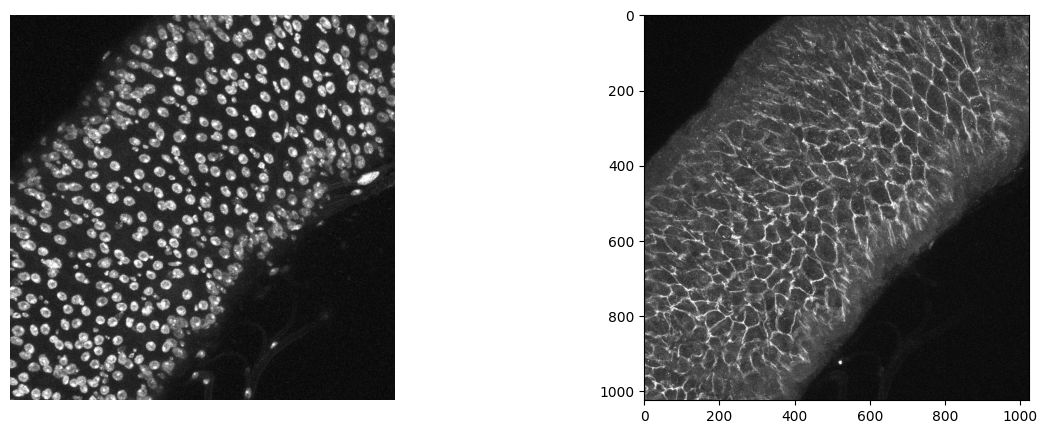

In [12]:
#plot images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(dapi_4h_mip[0], cmap = 'grey'))
axes[0].axis('off')

(axes[1].imshow(lgl_4h_mip[0], cmap = 'grey'))
axes[0].axis('off')

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

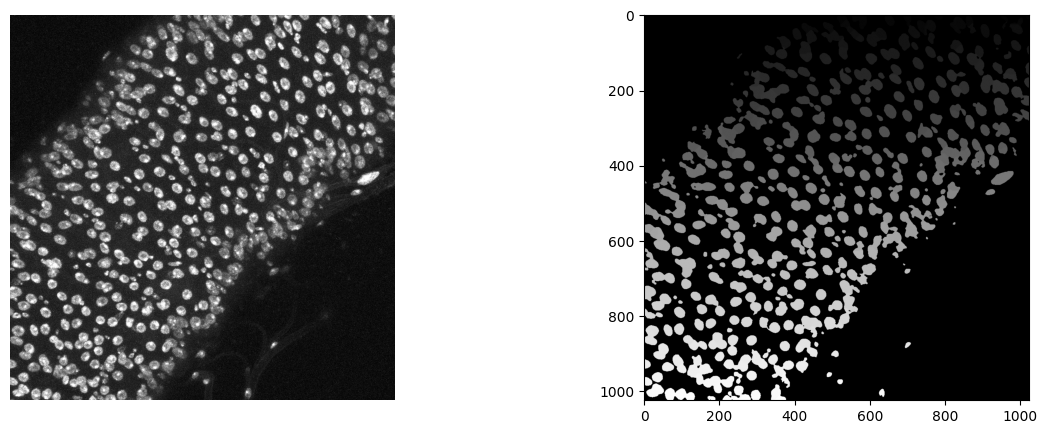

In [13]:
#now to segment the nuclei

labeled_nuclei_list = [
    voronoi_otsu_labeling(img, spot_sigma=5, outline_sigma=2)
    for img in dapi_4h_mip
]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(dapi_4h_mip[0], cmap = 'grey'))
axes[0].axis('off')

(axes[1].imshow(labeled_nuclei_list[0], cmap = 'grey'))
axes[0].axis('off')


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

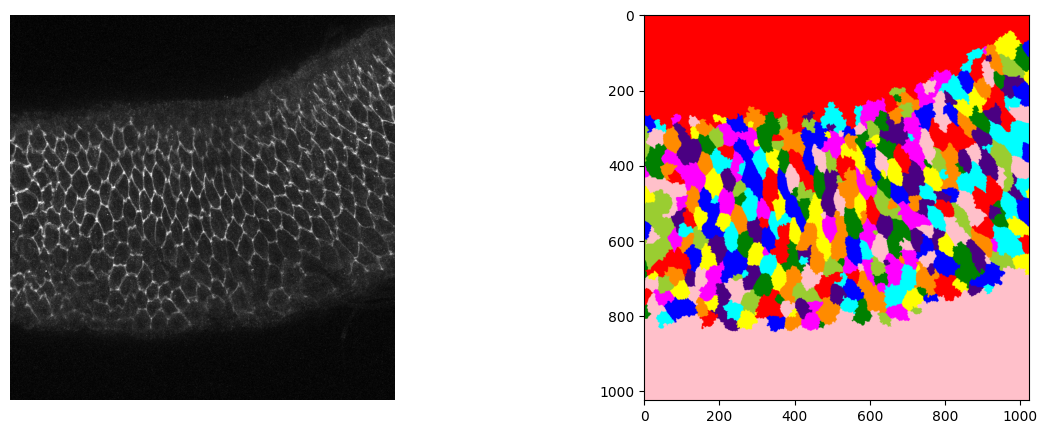

In [14]:
#now label the cells
from skimage.color import label2rgb

labeled_cells_list = [
    seeded_watershed(img, nuclei)
    for nuclei, img in zip(labeled_nuclei_list, lgl_4h_mip)
]



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(lgl_4h_mip[1], cmap = 'grey'))
axes[0].axis('off')

axes[1].imshow(label2rgb(labeled_cells_list[1], bg_label=0))
axes[0].axis('off')

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

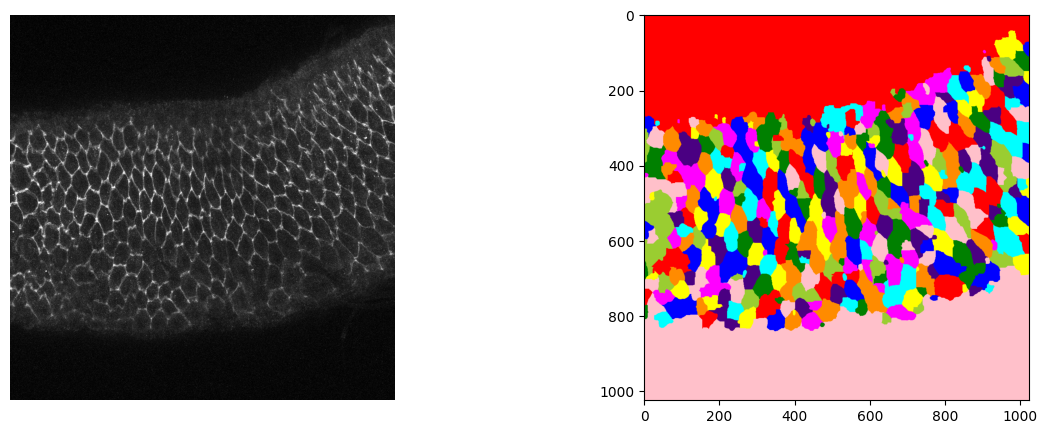

In [15]:
#improve the segmentation

blurred_list = [
    gaussian(img, sigma=3)
    for img in lgl_4h_mip
]

labeled_cells_list_1 = [
    seeded_watershed(img, nuclei)
    for nuclei, img in zip(labeled_nuclei_list, blurred_list)
]


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(lgl_4h_mip[1], cmap = 'grey'))
axes[0].axis('off')

axes[1].imshow(label2rgb(labeled_cells_list_1[1], bg_label=0))
axes[0].axis('off')

In [16]:
#now to measure

# Get properties for each labeled cell in each image
properties_list = [
    measure.regionprops(label, intensity_image=img)
    for label, img in zip(labeled_cells_list_1, lgl_4h_mip)
]

# Flatten into one list of regions
all_properties = [prop for props in properties_list for prop in props]

properties_list = [
    measure.regionprops(label, intensity_image=img)
    for label, img in zip(labeled_cells_list_1, lgl_4h_mip)
]

# Flatten into one list of regions and keep track of image file name
all_properties = []
component_names = []

for filename, props in zip(image_path_list_4h, properties_list):
    all_properties.extend(props)
    component_names.extend([filename] * len(props))

# Extract statistics
statistics = {
    'component':    component_names,
    'area':         [p.area for p in all_properties],
    'eccentricity': [p.eccentricity for p in all_properties],
    'major_axis':   [p.major_axis_length for p in all_properties],
    'perimeter':    [p.perimeter for p in all_properties],
    'csi':          [p.perimeter / math.sqrt(p.area) for p in all_properties]
}

# Convert to DataFrame
df = pd.DataFrame(statistics)

# Save
df.to_csv(
    "/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/cellshape_analysis_batch.csv",
    index=False
)

df.head()


,component,area,eccentricity,major_axis,perimeter,csi
0,/home/jadeaphillips/Quantitative_Bio_Image_Ana...,555.0,0.919920,47.362366,122.562446,5.202486
1,/home/jadeaphillips/Quantitative_Bio_Image_Ana...,56.0,0.516037,9.293852,26.621320,3.557424
2,/home/jadeaphillips/Quantitative_Bio_Image_Ana...,739.0,0.837145,44.131460,131.734019,4.845914
3,/home/jadeaphillips/Quantitative_Bio_Image_Ana...,189.0,0.896542,24.673114,60.420310,4.394931
4,/home/jadeaphillips/Quantitative_Bio_Image_Ana...,992.0,0.850635,56.894551,168.254834,5.342096


In [ ]:
dapi_16h = [img[:, :, :, 0] for img in images_16h]   # first channel
lgl_16h  = [img[:, :, :, 1] for img in images_16h]   # second channel

print(f"Number of DAPI images (12h): {len(dapi_16h)}")
print(f"Shape of first DAPI image: {dapi_16h[0].shape}")


In [ ]:
#max intensity project

dapi_16h_mip = [np.max(img, axis=0) for img in dapi_16h]
lgl_16h_mip  = [np.max(img, axis=0) for img in lgl_16h]

print(f"Shape before MIP: {dapi_16h[0].shape}")  # (z, y, x)
print(f"Shape after MIP: {dapi_16h_mip[0].shape}")  # (y, x)

In [ ]:
#plot images
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(dapi_16h_mip[0], cmap = 'grey'))
axes[0].axis('off')

(axes[1].imshow(lgl_16h_mip[0], cmap = 'grey'))
axes[0].axis('off')

In [ ]:
labeled_nuclei_list_16 = [
    voronoi_otsu_labeling(img, spot_sigma=5, outline_sigma=2)
    for img in dapi_16h_mip
]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(dapi_16h_mip[0], cmap = 'grey'))
axes[0].axis('off')

(axes[1].imshow(labeled_nuclei_list_16[0], cmap = 'grey'))
axes[0].axis('off')

In [ ]:

labeled_cells_list_16 = [
    seeded_watershed(img, nuclei)
    for nuclei, img in zip(labeled_nuclei_list_16, lgl_16h_mip)
]



fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(lgl_16h_mip[1], cmap = 'grey'))
axes[0].axis('off')

axes[1].imshow(label2rgb(labeled_cells_list_16[1], bg_label=0))
axes[0].axis('off')

In [ ]:
blurred_list = [
    gaussian(img, sigma=3)
    for img in lgl_4h_mip
]

labeled_cells_list_16_1 = [
    seeded_watershed(img, nuclei)
    for nuclei, img in zip(labeled_nuclei_list_16, blurred_list)
]


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
(axes[0].imshow(lgl_4h_mip[1], cmap = 'grey'))
axes[0].axis('off')

axes[1].imshow(label2rgb(labeled_cells_list_16_1[1], bg_label=0))
axes[0].axis('off')

In [ ]:
#now to measure

# Get properties for each labeled cell in each image
properties_list = [
    measure.regionprops(label, intensity_image=img)
    for label, img in zip(labeled_cells_list_16_1, lgl_16h_mip)
]

# Flatten into one list of regions
all_properties = [prop for props in properties_list for prop in props]

properties_list = [
    measure.regionprops(label, intensity_image=img)
    for label, img in zip(labeled_cells_list_16_1, lgl_16h_mip)
]

# Flatten into one list of regions and keep track of image file name
all_properties = []
component_names = []

for filename, props in zip(image_path_list_16h, properties_list):
    all_properties.extend(props)
    component_names.extend([filename] * len(props))

# Extract statistics
statistics_16h = {
    'component': component_names,
    'area': [p.area for p in all_properties],
    'eccentricity': [p.eccentricity for p in all_properties],
    'major_axis': [p.major_axis_length for p in all_properties],
    'perimeter': [p.perimeter for p in all_properties],
    'csi': [p.perimeter / math.sqrt(p.area) for p in all_properties]
}

# Convert to DataFrame
df = pd.DataFrame(statistics_16h)

# Save
df.to_csv(
    "/home/jadeaphillips/Quantitative_Bio_Image_Analysis_with_Python_2022-main/data/eccentricity/cellshape_analysis_batch_16h.csv",
    index=False
)

df.head()


In [20]:
eccentricity_4h = [p.eccentricity for p in all_properties]


# A good practice is to wrap the main logic in a function for reusability.
def visualize_eccentricity(label_image, eccentricities, colormap_name='viridis'):
    """
    Color-codes a labeled image based on eccentricity values.

    Args:
        label_image (np.ndarray): A 2D NumPy array where each pixel
                                  belongs to a labeled object (e.g., cell).
                                  Background is assumed to be 0.
        eccentricities (list or dict): A list or dictionary containing the
                                     eccentricity value for each label ID.
                                     Eccentricity should be in the range [0, 1].
        colormap_name (str): The name of the matplotlib colormap to use.

    Returns:
        np.ndarray: A 3D NumPy array representing the color-coded image.
    """
    # Get a colormap from matplotlib
    colormap = cm.get_cmap(colormap_name)

    # Normalize the eccentricity values to a [0, 1] range to map to the colormap.
    # We use a try-except block to handle cases where no cells are found.
    try:
        min_val = min(eccentricities)
        max_val = max(eccentricities)
        if max_val == min_val:
            normalized_eccentricities = [0.5] * len(eccentricities)  # Use a neutral color if all values are the same
        else:
            normalized_eccentricities = [
                (e - min_val) / (max_val - min_val) for e in eccentricities
            ]
    except ValueError:
        print("No cells found to calculate eccentricity for.")
        return np.zeros(label_image.shape + (3,))  # Return an empty black image

    # Create an empty RGB image to draw the color-coded cells onto
    color_coded_image = np.zeros(label_image.shape + (3,), dtype=np.float64)

    # Iterate over each unique label (cell) in the image
    for i, label_id in enumerate(np.unique(label_image)):
        if label_id == 0:
            continue  # Skip the background (label 0)

        # Get the normalized eccentricity for the current label
        normalized_eccentricity = normalized_eccentricities[i - 1]  # Subtract 1 because label IDs start from 1, not 0

        # Get the color from the colormap based on the normalized eccentricity
        color = colormap(normalized_eccentricity)[:3]  # The [:3] gets the RGB values

        # Find the pixels that belong to the current label
        cell_mask = label_image == label_id

        # Apply the color to the corresponding pixels in the output image
        color_coded_image[cell_mask] = color

    return color_coded_image


color_coded_image = visualize_eccentricity(labeled_cells_list_1[1], eccentricity_4h[1], colormap_name='viridis')
#plt.imshow(color_coded_image)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(lgl_4h_mip[1], cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Labeled image
axes[1].imshow(labeled_cells_list_1[1], cmap='nipy_spectral')
axes[1].set_title('Labeled Cells')
axes[1].axis('off')

# Color-coded eccentricity map
im = axes[2].imshow(color_coded_image)
axes[2].set_title('Cell Eccentricity (0-1)')
axes[2].axis('off')

# Add a color bar to show the scale of eccentricity
cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
cbar.set_label('Eccentricity (0=circular, 1=elongated)', rotation=270, labelpad=15)


/tmp/ipykernel_9125/596370862.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(colormap_name)


TypeError: 'float' object is not iterable